# Project 2a: Alloy cluster expansions

In this project you will construct an alloy cluster expansion model for the Ag-Pd alloy.
Note that it is not required for you to understand all the details of the cluster-expansion formalism in order to solve the project.
Rather you will be using an external package for computing the fit/sensing matrix and compiling the target vector.

**You should hand in a report, via Canvas, maximum 6 pages (excluding references). 
Do not attach any appendices. In the report you should present your data, models and the final results.
Do not forget to visualize your data and results.
It is important that you discuss your findings and reflect on the results.
In addition you need to hand in your Python code.
The code itself will not be graded, but it should run without errors and upon inspection reproduce the main results you present in the report.
Emphasis will be put on your ability to use appropriate terminology to describe and discuss the employed statistical methodologies and results.**

**<font color=red>DEADLINE: Nov 27, 23:59</font>**


## Alloys

Alloys are multicomponent systems, in which several species are mixed with each other on at least one sublattice.
Examples include metallic alloys such as steel or bronze as well as semiconductor alloys such as gallium indium nitride (blue lasers).
In order to study the energetics of such systems on the atomistic scale one often resorts to density functional theory (DFT) calculations, which can provide the energy of a given atomistic structure with high accuracy.
The mixing energy per atom of a structure is defined as
\begin{equation}
\large
    E_\text{mix} = \frac{E_\text{structure} - n_\text{Ag} E_\text{Ag} - n_\text{Pd} E_\text{Pd}}{n_\text{Ag} + n_\text{Pd}}
\end{equation}
where $E_\text{structure}$ is the total energy of the structure, $n_\text{Ag}$ number of Ag atoms in the structure and $E_\text{Ag}$ the energy of pure Ag.
Working with the mixing energy is often convient as it is the relevant energy when considering e.g. phase stability of alloys.
Below a few different structures (configurations) are displayed.

<img src="images/configurations.png" alt="Drawing" style="width: 750px;"/>



## The configurational space problem
If we consider a binary system (A-B) and a lattice consisting of 100 atoms, this yields $2^{100}\approx 10^{30}$ ways of occupying the lattice.
While many of the structures will be duplicates when considering translation and rotational invariance we are still left with a huge number of configurations that would need to be considered, e.g., when calculating thermodynamic averages or conducting ground state searches.
Calculating the energy of multiple structures with DFT is computationally very expensive and thus to solve this configurational space problem one often turns to building atomistic models based on DFT.
So-called alloy cluster expansions are the most commonly employed technique in this context.


## Cluster expansions
The alloy cluster expansion model is based on an ideal lattice.
This lattice can be occupied by various atomic species (Ag and Pd in our case).
In this approach the energy of the atomic structure is modeled as a sum over the average number of times a particular cluster occurs multiplied with corresponding effective cluster interactions (ECIs).
Formally
\begin{equation}
    \large
    E_\text{mix} = J_0 + \sum _\alpha N_\alpha J_\alpha,
\end{equation}
where $\alpha$ refers to various clusters such as nearest neighbor pairs, next nearest neighbor pairs, triplets etc, $N_\alpha$ refers to the number of such clusters for the present structure per atom and $J_\alpha$ is the corresponding effective cluster interaction (ECI) for cluster $\alpha$.
In this project, it is of no concern how the extraction of identical and unique clusters using crystal symmetries is done.

<img src="images/clusters_v1.png" alt="Drawing" style="width: 650px;"/>

Instead we will focus on how to determine the unknown parameters (ECIs) $J_\alpha$, and how to choose which type of clusters to include in the model, i.e. the size and structure of the parameter space.
If the clusters $\alpha$ are enumerated, the equation above can be formulated as a dot product by defining $\boldsymbol{x}=[1, N_1, N_2, \ldots]$ and $\boldsymbol{J}=[J_0, J_1, J_2, \ldots]$ as $E_\text{mix} = \boldsymbol{x} \boldsymbol{J}$.
Here, $\boldsymbol{x}$ is often refered to as the cluster vector of the given configuration.

If the mixing energy $E_\text{mix}$ is calculated using DFT for a set of configurations, then the problem of finding the ECIs $\boldsymbol{J}$ can be solved, e.g., using ordinary least-squares (OLS)
\begin{equation}
    \large
    \boldsymbol{J}_\text{opt} = \min_\boldsymbol{J} || \boldsymbol{X} \boldsymbol{J} - \boldsymbol{E}_\text{mix} ||_2 ^2,
\end{equation}
where $\boldsymbol{E}_\text{mix}$ is a vector containing the mixing energies for all structures and $\boldsymbol{X}$ a matrix, each row of which corresponds to a cluster vector of one of the structures.


## The linear problem
While OLS is the simplest method for finding ECIs, it has a tendency for overfitting.
Linear regression with regularization such as ridge or LASSO are therefore favorable alternatives.
A common issue in finding the ECIs is to select an approriate number of features (clusters) to include in the model.
Features in our problem correspond to clusters with different interatomic distances and of different order (pairs, triplets etc; see above).
Including too few (many) can lead to underfitting (overfitting).

In this project you will construct cluster expansion models using linear regression methods such as Lasso and ARDR.
You will use cross-validation (CV) but also information criteria such as AIC and BIC in order to evaluate how many features are reasonable to include in your model.
For more information and details about these methods and metrics, consult the section "Additional Information" below.
Lastly, you will see how Bayesian parameter estimation of the ECIs can be used to analyze results obtained via a cluster expansion.



### Cross-validation
You may freely choose a suitable cross-valdation method to use for the following tasks.
K-fold is commonly used and available through `sklearn` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).
Ten folds might be a good starting point to try out.


### Information criteria
The Bayesian information criteria (BIC) is defined as
\begin{equation}
\text{BIC} = 2 \log(L_*) - N_p \log(N_d)
\end{equation}
where $L_*$ is the maximized likelihood, $N_p$ the number of parameters, and $N_d$ number of data points.     
The energies (or data) can be modeled through
Here we assume the errors, $\epsilon$, are normal distributed with zero mean and variance $\sigma^2$.
\begin{equation}
\boldsymbol{E} = \boldsymbol{x} \boldsymbol{J} + \epsilon , \quad \epsilon \sim \mathcal{N}(\mu=0, \sigma^2) \\
\end{equation}
Therefore the likelihood, $P(D|\boldsymbol{J}, \sigma)$, can be defined as
\begin{equation}
L = P(D|\boldsymbol{J}, \sigma) = \frac{1}{(2\pi \sigma^2)^{N_d/2}}\exp{(-||\boldsymbol{X} \boldsymbol{J}-\boldsymbol{E} ||^2 / 2\sigma^2)}
\end{equation}
The ECIs, $\boldsymbol{J}$, you will obtain from linear regression algorithms (LASSO, etc), and $\sigma$ can be found from setting $\frac{\mathrm{d} L }{\mathrm{d} \sigma} = 0$. This is left as an exercise to the reader but the final expression for BIC becomes
\begin{equation}
\text{BIC} = -N_d \log(\text{MSE}) - N_p \log(N_d) + \text{const}
\end{equation}
where the constant term, $\text{const}$, is irrelevant and $\text{MSE}$ is the mean squared error, defined as 
\begin{equation}
\text{MSE} = \frac{1}{N_d}||\boldsymbol{X} \boldsymbol{J}-\boldsymbol{E} ||^2
\end{equation}

### sklearn
Regression algorithms such as Lasso, ridge, automatic relevance detection (ARD) and many more are available via [`sklearn`](https://scikit-learn.org/).

*Note: Since we are including the constant term in our cluster vectors (corresponding to $J_0$ and implying that the first element is always 1), we need to set `fit_intercept=False` when using the linear models from sklearn.*

## Additional information
Additional information in regards to cluster expansions and how these can be trained and used can be found in the  following papers:

* [*Robust data-driven approach for predicting the configurational energy of high entropy alloys*](https://doi.org/10.1016/j.matdes.2019.108247) (doi:10.1016/j.matdes.2019.108247)
* [*ICET – A Python Library for Constructing and Sampling Alloy Cluster Expansions*](https://doi.org/10.1002/adts.201900015) (doi:10.1002/adts.201900015)

## Setup

In this project you will need to use the [`ase` package](https://wiki.fysik.dtu.dk/ase) package for reading and handling atomistic structures.
We will also use the [`icet` package](https://icet.materialsmodeling.org/) (integrated cluster expansion toolkit) devloped here at Chalmers in order to construct cluster vectors.
Both of these packages are pre-installed on the jupyterhub instance for the course.

In [58]:
# Internal imports
import os
import pickle

# External imports
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
import ase
import icet
import sklearn.linear_model as skl
from sklearn.model_selection import KFold
import seaborn as sns
import emcee

#sns.set_theme()

# Set plot params
plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize

# Task 1: Collect and plot the data (0.5p)
Start by reading and collecting the atomic structures and their corresponding properties (such as mixing energy) from the [ASE database](https://wiki.fysik.dtu.dk/ase/ase/db/db.html) located in `structures/reference_data.db`.

The structures are available as [ASE Atoms](https://wiki.fysik.dtu.dk/ase/ase/atoms.html) objects which have attributes such as
* positions
* cell
* numbers (atomic numbers)
* symbols (atomic symbols)

This database can for example be read by the following code snippet

In [2]:
from ase.db import connect

db = connect('structures/reference_data.db')
for row in db.select():
    atoms = row.toatoms()
    E_mix = row.mixing_energy
    #print(row.symbols, E_mix)

Here each row corresponds to an atomic structure with an attached mixing energy in units of meV per atom.      

**Task:** 
* Read the database and collect the atomic structures and energies.
* Plot the mixing energy as a function of Pd concentration

<generator object Database.select at 0x1253f27d0>


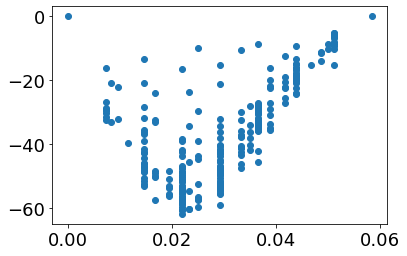

In [3]:
def get_concentration(row_symbols, atoms):
    return np.count_nonzero(np.array(row_symbols) == 'Pd')/(atoms.get_volume())#/len(row_symbols)

print(db.select())
concentration = []

for row in db.select(): 
    atoms = row.toatoms()
    cons = get_concentration(row.symbols, atoms)
    E_mix = row.mixing_energy
    concentration.append([cons,E_mix])
    
concentration = np.array(concentration)

    
fig,ax = plt.subplots()
ax.scatter(concentration[:,0], concentration[:,1])

## Task 2: Cutoff selection for a pair cluster-expansion  (5p)
In this task you will construct cluster expansions based only on pairs.
Your cluster expansion thus has a hyper-parameter, namely the pair cutoff, which needs to be determined.
For this task you will use `icet` to construct cluster vectors.
This can be done by first creating a [`ClusterSpace` object](https://icet.materialsmodeling.org/moduleref_icet/cluster_space.html) which requires a list of cutoffs.

In [4]:
from icet import ClusterSpace

# setup CS
cutoffs = [6, 5, 4]
prim = db.get(1).toatoms()
cs = ClusterSpace(prim, cutoffs=cutoffs, chemical_symbols=['Ag', 'Pd'])

# get cluster-vector for a given atoms object
atoms = db.get(3).toatoms()
x = cs.get_cluster_vector(atoms)
print(x.shape)


(9,)


In the code above cutoffs of 6 Å for pairs, 5 Å for triplets and 4 Å for quadruplets are used.
When only using pairs, as in this task, simply use `cutoffs=[r2]`, where `r2` is the pair-wise cutoff.

**Tasks:**
* For a range of pair cutoffs, use OLS to compute the training and CV errors and the information criteria AIC and BIC.
* How would you based on these error/metrics select your pair cutoff, discuss and explain your reasoning.


*Note: Since the constant term is included in our cluster vectors we need to set `fit_intercept=False` when using the linear models from sklearn.*

In [29]:
def MSE(X,y, model):
    y_pred = model.predict(X)
    return np.mean((y_pred - y)**2)


def get_aic_bic(X, y, model, nbr_non_zero_params):

    n_samples = len(y)
    n_parameters = nbr_non_zero_params
    mse = MSE(X, y, model) # This assumes all models have Gaussian noise (Gaussian likelihood for ARDR)
    RSS = mse*n_samples
    sigma2 = RSS/n_samples # = MSE
    
    log_MLE = -0.5*RSS/sigma2 - 0.5*n_samples*np.log(sigma2) - 0.5*n_samples*np.log(2*np.pi) 
    
#     aic = -(n_samples * np.log(mse) + 2 * n_parameters)
#     bic = -(n_samples * np.log(mse) + n_parameters * np.log(n_samples))

    aic = 2*log_MLE - 2*n_parameters
    bic = 2*log_MLE - n_parameters*np.log(n_samples)
    
    return aic, bic


def perform_cv(X, y, n_splits, regression_model, model_parameters=None):

    kf = KFold(n_splits=n_splits)
    
    train_errors = np.zeros(n_splits)
    test_errors = np.zeros(n_splits)
    i = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = regression_model(X_train, y_train, model_parameters=model_parameters)
        train_errors[i] = MSE(X_train,y_train, model) # mean squared error
        test_errors[i] = MSE(X_test,y_test, model)
        i += 1
    #data = {"train_error": train_errors.mean(), "train_std": train_errors.std(),\
    #        "test_error": test_errors.mean(),"test_std":test_errors.std()}
    data = [train_errors.mean(), train_errors.std(), test_errors.mean(), test_errors.std()]
    return data


def OLS_fit(X,y, model_parameters=None):
    model = skl.LinearRegression(fit_intercept=False).fit(X,y)
    return model


def LASSO_fit(X,y, model_parameters=None):
    model = skl.Lasso(alpha=model_parameters, tol=1e-6, max_iter=1e5, fit_intercept=False).fit(X,y)
    return model


def ARDR_fit(X,y, model_parameters=None):
    model = skl.ARDRegression(threshold_lambda=model_parameters, fit_intercept=False).fit(X,y)
    return model


def normalize_data(X,y):
    y_tilde = (y-np.mean(y))/np.std(y)
    red_X = X[:,1:] # Skip first column (bias)
    X_tilde = np.ones(X.shape)
    X_tilde[:, 1:] = (red_X-np.mean(red_X, axis=0))/np.std(red_X, axis=0)
    return X_tilde, y_tilde

def get_nbr_parameters(cutoffs):
    db = connect('structures/reference_data.db')
    prim = db.get(1).toatoms()
    cs = ClusterSpace(prim, cutoffs=cutoffs, chemical_symbols=['Ag', 'Pd'])
    atoms = db.get(1).toatoms()
    nbr_parameters = cs.get_cluster_vector(atoms).shape[0]
    
    return cs, nbr_parameters

def get_non_zero_params(model_params, parameter_tol):
    non_zero_idx = np.where(np.abs(model_params) > parameter_tol)[0]
    return non_zero_idx, model_params[non_zero_idx]
    
def get_data(nbr_data, nbr_parameters, cs):
    X = np.zeros((nbr_data,nbr_parameters)) # design matrix
    y = np.zeros(nbr_data)
    for j, row in enumerate(db.select()):
        atoms = db.get(j+1).toatoms()
        x = cs.get_cluster_vector(atoms)
        X[j,:] = x
        y[j] = row.mixing_energy
    return X, y 
    
def cutoff_analysis(cutoffs, nbr_data, n_splits, regression_model, model_parameters=None, parameter_tol=1e-4):
    cs, nbr_parameters = get_nbr_parameters(cutoffs)
    X, y = get_data(nbr_data, nbr_parameters, cs)
    
    X, y = normalize_data(X,y)
    CV_score = perform_cv(X,y,n_splits, regression_model, model_parameters)
    model = regression_model(X,y, model_parameters)
    
    non_zero_idx, non_zero_params = get_non_zero_params(model.coef_, parameter_tol)
    nbr_non_zero_params = len(non_zero_idx)
    
    AIC, BIC = get_aic_bic(X,y, model, nbr_non_zero_params)
    
    return CV_score, nbr_non_zero_params, model.coef_, AIC, BIC

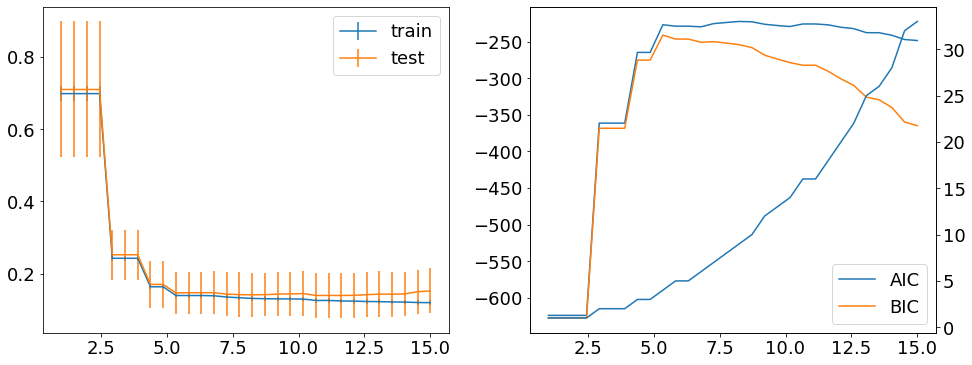

In [6]:
# setup CS
nbr_data = len(concentration[:,0])
n_splits = 10
nbr_cutoffs = 30
min_cutoff = 1
max_cutoff = 15

CV_score = np.zeros((nbr_cutoffs,4))
AIC = np.zeros(nbr_cutoffs)
BIC = np.zeros(nbr_cutoffs)
nbr_parameters = np.zeros(nbr_cutoffs, dtype = int)

cutoffs = np.linspace(min_cutoff, max_cutoff, nbr_cutoffs)
for i, cutoff in enumerate(cutoffs):
    CV_score[i,:], nbr_parameters[i], _, AIC[i], BIC[i] = cutoff_analysis([cutoff], nbr_data, n_splits, OLS_fit, None)


# Plot 
fig,ax = plt.subplots(1,2, figsize = (16,6))

ax[0].errorbar(cutoffs, CV_score[:,0], yerr = CV_score[:,1], label = "train")
ax[0].errorbar(cutoffs, CV_score[:,2], yerr = CV_score[:,3], label = "test")
ax[0].legend()

ax[1].plot(cutoffs,AIC, label = "AIC")
ax[1].plot(cutoffs,BIC, label = "BIC")
ax2 = ax[1].twinx()
ax2.plot(cutoffs,nbr_parameters)
ax[1].legend()

plt.savefig(f'cutoff_scan.png')

[ 1  1  1  1  2  2  2  3  3  4  5  5  6  7  8  9 10 12 13 14 16 16 18 20
 22 25 26 28 32 33]


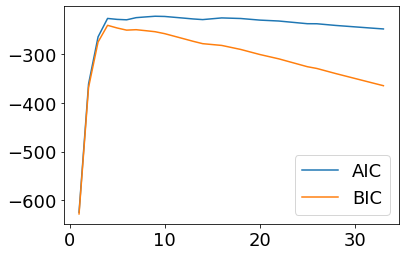

In [7]:
print(nbr_parameters)
plt.plot(nbr_parameters,AIC, label = "AIC")
plt.plot(nbr_parameters,BIC, label = "BIC")
plt.legend()

## Task 3:  Feature selection  (5p)
An alternative approach to "manually" finding good values for the cutoffs is to simply select a long-ranged model and use feature-selection methods to automatically select which cluster interactions (parameters) are important and which are not.

In this task you will try out the feature selection approach by using cutoffs `[13, 8, 6]`, and employing LASSO and ARDR. (Feel free to try out other feature selection algorithms like e.g. OMP, RFE)

LASSO has a hyper-parameter `alpha` which determines the sparsity of the solution (number of nonzero parameters). ARDR has a hyper-parameter `threshold_lambda` which sets how many nonzero parameters appear in the solution.

See the documentation here
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html


Scan a range of values for the respective hyper-parameter and evaluate CV-error and IC to determine a good value for the hyper-parameters. Records also how many nonzero parameters you obtained.

**Tasks:**
* Standardize the data. Why is this important for these two feature selection algorithms?
* Compute the training and CV error for a range of values for the hyper-parameters.
* Visualize the training error and CV-error as well as the AIC/BIC as function of number of non-zero parameters in the model.    

**Discuss:**
* How many features you think is suitable to include in a final model based on your analysis.
* Does LASSO and ARDR select the same features?
* Discuss the differences between LASSO and ARDR.

*Note: Since the constant term is included in our cluster vectors we need to set `fit_intercept=False` when using the linear models from sklearn.*

In [8]:
def scan_hyperparameter(regression_model, n_hyper, min_hyper, max_hyper, n_splits, nbr_data, parameter_tol, pickle_file):
    if(os.path.isfile(pickle_file)):
        print('Using pickled hyperparameter scan')
        res = pickle.load( open( pickle_file, 'rb' ) )
    else:
        print('No hyperparameter scan file found. Running hyperparameter scan')
        cutoffs = [13, 8, 6]   
        CV_score = np.zeros((n_hyper,4))
        AIC = np.zeros(n_hyper)
        BIC = np.zeros(n_hyper)

        _, nbr_parameters = get_nbr_parameters(cutoffs)
        parameters = np.zeros((n_hyper, nbr_parameters))
        nbr_non_zero_params = np.zeros(n_hyper, dtype = int)


        hypers = np.logspace(min_hyper, max_hyper, n_hyper)

        for i, hyper in enumerate(hypers):
            CV_score[i,:], nbr_non_zero_params[i], parameters[i,:], AIC[i], BIC[i] = cutoff_analysis(cutoffs, nbr_data, n_splits, regression_model, hyper, parameter_tol)

        res = (CV_score, nbr_non_zero_params, parameters, AIC, BIC, hypers)
        
        pickle.dump(res, open( pickle_file, "wb" ))
    
    CV_score, nbr_non_zero_params, parameters, AIC, BIC, hypers = res
    
    return CV_score, nbr_non_zero_params, parameters, AIC, BIC, hypers
 

def plot_scan_hyperparameter(hypers, CV_score, nbr_non_zero_params, AIC, BIC, title):
    # Plot 
    fig,ax = plt.subplots(1,2, figsize = (16,6))
    
    ax[0].errorbar(hypers, CV_score[:,0], yerr = CV_score[:,1], label = "train")
    ax[0].errorbar(hypers, CV_score[:,2], yerr = CV_score[:,3], label = "test")
    ax[0].legend()
    ax[0].set_xscale('log')

    ax[1].plot(hypers,AIC, label = "AIC")
    ax[1].plot(hypers,BIC, label = "BIC")
    ax[1].set_xscale('log')
    ax2 = ax[1].twinx()
    ax2.plot(hypers,nbr_non_zero_params, c='r')
    ax[1].legend()
    
    fig.suptitle(title)
    
    plt.savefig(f'{title}_scan.png')

In [9]:
# Overall setup 
parameter_tol = 1e-4
n_splits = 10
nbr_data = len(concentration[:,0])

Using pickled hyperparameter scan


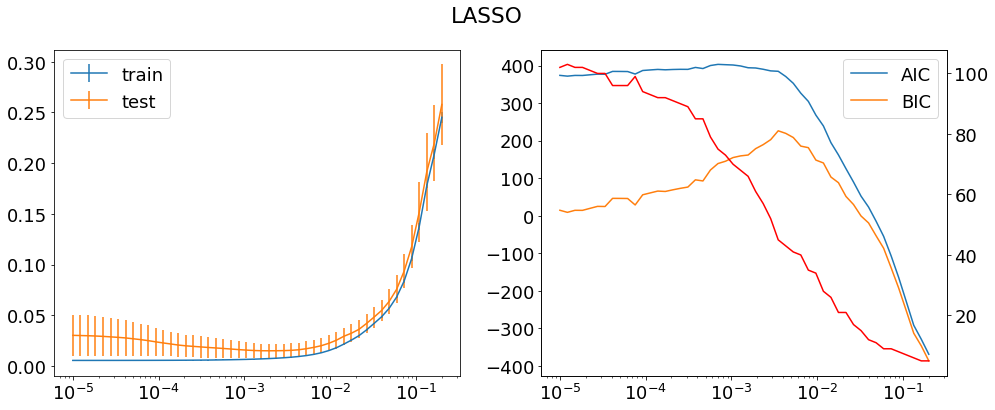

In [10]:
# LASSO - Scan alpha
nbr_alpha = 50
min_alpha = np.log10(1e-5)
max_alpha = np.log10(0.2)

CV_score_lasso, nbr_non_zero_params_lasso, model_parameters_lasso, AIC_lasso, BIC_lasso, alphas = scan_hyperparameter(LASSO_fit, nbr_alpha, min_alpha, max_alpha, n_splits, nbr_data, parameter_tol, f'scan_lasso_n={nbr_alpha}.p')
plot_scan_hyperparameter(alphas, CV_score_lasso, nbr_non_zero_params_lasso, AIC_lasso, BIC_lasso, title='LASSO')

Using pickled hyperparameter scan


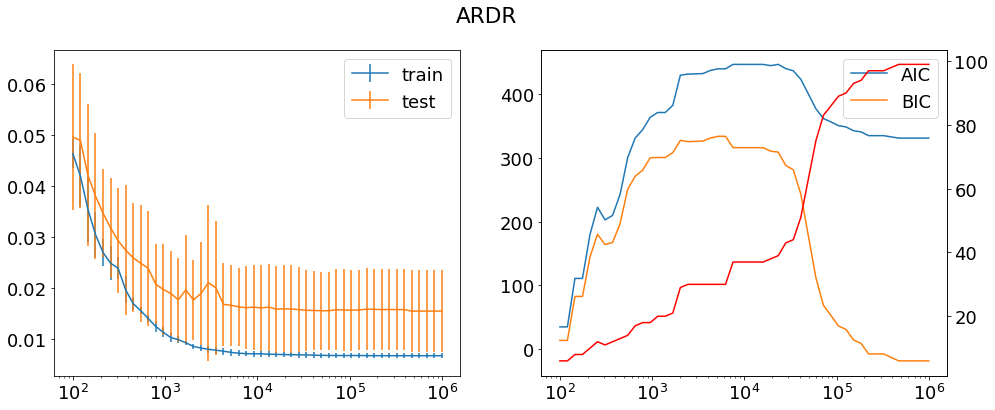

In [11]:
# ARDR - Scan lambda
nbr_lambda = 50
min_lambda = np.log10(1e2)
max_lambda = np.log10(1e6)

CV_score_ardr, nbr_non_zero_params_ardr, model_parameters_ardr, AIC_ardr, BIC_ardr, lambdas = scan_hyperparameter(ARDR_fit, nbr_lambda, min_lambda, max_lambda, n_splits, nbr_data, parameter_tol, f'scan_ardr_n={nbr_alpha}.p')
plot_scan_hyperparameter(lambdas, CV_score_ardr, nbr_non_zero_params_ardr, AIC_ardr, BIC_ardr, title='ARDR')

Feature match: 100.00%


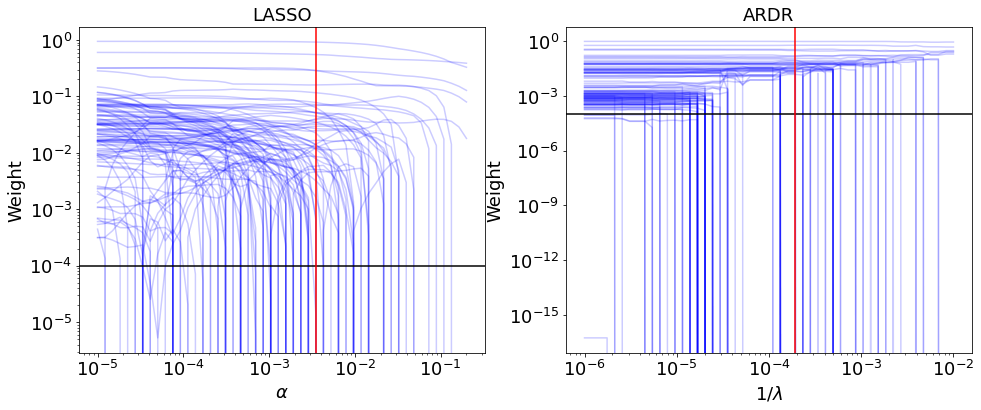

In [12]:
opt_idx_lasso = np.argmax(BIC_lasso)
opt_idx_ardr = np.argmax(BIC_ardr)
alpha_optimum = alphas[opt_idx_lasso]
lambda_optimum = lambdas[opt_idx_ardr]

nz_idx_lasso, nz_val_lasso = get_non_zero_params(model_parameters_lasso[opt_idx_lasso,:], parameter_tol) 
nz_idx_ardr, nz_val_ardr = get_non_zero_params(model_parameters_ardr[opt_idx_ardr,:], parameter_tol) 

def get_matches(arr1, arr2):
    # Get longest array
    if(len(arr1) >= len(arr2)):
        big = arr1
        small = arr2
    else:
        big = arr2
        small = arr1
    matches = [1 if i in small else 0 for i in big]
    match_per = np.sum(matches) / len(small) * 100
    return matches, match_per

matches, match_per = get_matches(nz_idx_lasso, nz_idx_ardr)
print(f'Feature match: {match_per:.2f}%')

fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].plot(alphas, np.abs(model_parameters_lasso), c='b', alpha=0.2)
ax[0].set_title('LASSO')
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel('Weight')
ax[0].axhline(parameter_tol, c='k')
ax[0].axvline(alpha_optimum, c='r')
ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[1].plot(1/lambdas, np.abs(model_parameters_ardr), c='b', alpha=0.2)
ax[1].set_ylabel('Weight')
ax[1].set_title('ARDR')
ax[1].set_xlabel(r'$1/\lambda$')
ax[1].axhline(parameter_tol, c='k')
ax[1].axvline(1/lambda_optimum, c='r')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

plt.savefig('lasso_ardr_weights.png')

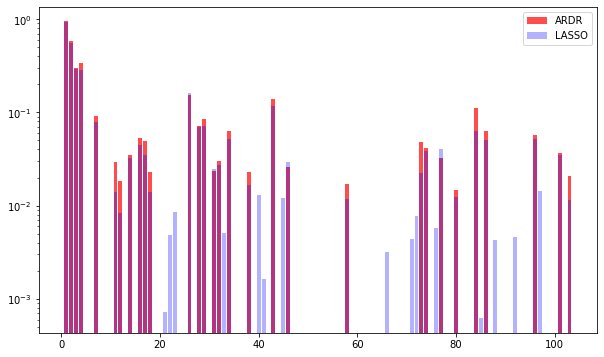

In [13]:
sns.reset_orig()
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x=nz_idx_ardr, height=np.abs(nz_val_ardr), color='r', alpha=0.7,  linewidth=3, label='ARDR')
ax.bar(x=nz_idx_lasso, height=np.abs(nz_val_lasso), color='b', alpha=0.3, linewidth=3, label='LASSO')
ax.set_yscale('log')
ax.legend(loc='best')

plt.savefig('lasso_ardr_weights_overlap.png')

## Task 4: Bayesian Cluster expansion   (7p)
In this final task you will try a bayesian approach to constructing cluster expansions.     
In this task use cutoffs `cutoffs=[12.0, 6.0]`.


### Priors
For this problem you can use a gaussian prior for the ECIs with a zero mean and variance $\alpha ^2$. This can be defined as
\begin{equation}
P(\boldsymbol{J}) = \frac{1}{(2\pi \alpha^2)^{N_p/2}}\exp{(-||\boldsymbol{J}||^2 / 2\alpha^2)}
\end{equation}
where $N_p$ is the number of ECIs (length of vector $\boldsymbol{J}$).
For the priors over $\sigma$ and $\alpha$ you can for example use inverse gamma distributions. The total prior $P(\boldsymbol{J}, \sigma, \alpha)$  is then given by the product of all priors.

### Posterior
In this task you will generate cluster expansion models from the posterior probability distribution $P(\boldsymbol{J}|D)$, where $D$ is the training data (cluster-vectors and energies). The posterior is defined as
\begin{equation}
\underbrace{P(\boldsymbol{J}, \sigma, \alpha|D)}_\text{posterior} = \underbrace{P(D|\boldsymbol{J}, \sigma)}_\text{likelihood} \underbrace{P(\boldsymbol{J}, \sigma, \alpha)}_\text{prior}/P(D)
\end{equation}


**Tasks:**
* Define the (log) liklihood, (log) prior and (log) posterior functions.
* Sample the posterior distribution using MCMC and generate about 100-1000 (uncorrelated) samples (models).
* Visualize the ECIs for a MCMC chain.


### The ground state

The ground-state structure refers to the structure with the lowest energy for a given concentration.
Macroscopic properties like thermal conductivity, heat-capacity etc can depend strongly on the particular ground-state configuration and it is therefore important to know the correct ground-state structure.

In the database `structures/ground_states_candidates.db` you will find potential ground-state candidates for $c_{Pd}=0.667$. In this task you will assign each ground-state candidate a probability of being the actual ground-state.


**Tasks:**
* Use OLS to predict which structure is the ground-state and the corresponding ground-state energy.
* Use the cluster-expansions samples (from MCMC) and compute the frequency of each candidate structure being the ground-state.
* Plot the disitrubtion of the ground-state energy.
* Compare the results from the previous two tasks with the OLS results and discuss.


*Hints:*
* `emcee` can be used for the MCMC sampling
* You may need to use a long burn-in period
* From previous tasks we expect $\sigma$ to be roughly in the range 1-10meV/atom, and $\alpha$ in roughly the range 5-50meV. 

In [81]:
# set prior parameters
def sigma_log_prior(sigma, a=1, b=1 ):
    return np.log(sc.stats.invgamma.pdf(sigma, a = a, scale = b))

def alpha_log_prior(alpha, a = 1, b=1):
    return np.log(sc.stats.invgamma.pdf(alpha, a = a, scale = b))
    
def ECI_log_prior(J, alpha):
    return - 0.5*J.T@J/alpha**2 - 0.5*len(J)*(np.log(2*np.pi) - 2*np.log(alpha))

def log_likelihood(J, X, y, sigma):
    
    return -0.5*(X@J - y).T @ (X@J - y)/sigma**2 - 0.5*len(J)*(np.log(2*np.pi) - 2*np.log(sigma))
 
def log_posterior(theta, X, y, a = 1, b= 1):
    size = len(theta)
    J = theta[0:size-2]
    sigma = theta[size-2]
    alpha = theta[size-1]
    if sigma<0 or alpha <0:
        return -np.inf
    
    return log_likelihood(J, X, y, sigma) + ECI_log_prior(J, alpha)\
            + alpha_log_prior(alpha, a, b) + sigma_log_prior(sigma, a, b)


In [117]:
cutoffs = [12, 6]
cs, J_dim = get_nbr_parameters(cutoffs)
n_dim = J_dim + 2
print(J_dim)
n_walkers = n_dim*2
n_samples = 50
burn_in = 100

print(len(concentration[:,0]), J_dim)
X, y =  get_data(len(concentration[:,0]), J_dim, cs)

initial = np.zeros((n_walkers,n_dim))
initial[:,0:J_dim] = 10*np.random.randn(n_walkers, J_dim)
initial[:,J_dim] = np.random.rand(n_walkers)
initial[:,J_dim+1] = np.random.rand(n_walkers)

sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_posterior, args=(X, y))

# Run burn in
sampler.run_mcmc(initial, burn_in)
final_state = sampler.get_last_sample()
# Sample posterior
sampler.reset()
res = sampler.run_mcmc(final_state, n_samples)
trace = sampler.get_chain()
print(sampler.acceptance_fraction)

#pickle.dump(trace_omega, open( "trace_omega_task2.p", "wb" ))

33
251 33
[0.38 0.3  0.38 0.28 0.38 0.4  0.38 0.4  0.48 0.38 0.36 0.34 0.44 0.38
 0.42 0.42 0.4  0.36 0.34 0.32 0.44 0.46 0.22 0.24 0.48 0.52 0.46 0.36
 0.58 0.24 0.54 0.44 0.36 0.46 0.44 0.46 0.42 0.38 0.32 0.34 0.5  0.42
 0.44 0.42 0.48 0.36 0.42 0.28 0.4  0.34 0.44 0.46 0.26 0.38 0.44 0.32
 0.4  0.4  0.44 0.48 0.36 0.32 0.34 0.36 0.4  0.42 0.42 0.44 0.42 0.44]


/Users/kevinandersson/opt/miniconda3/envs/Physics-env/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/kevinandersson/opt/miniconda3/envs/Physics-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


100.51354930390706


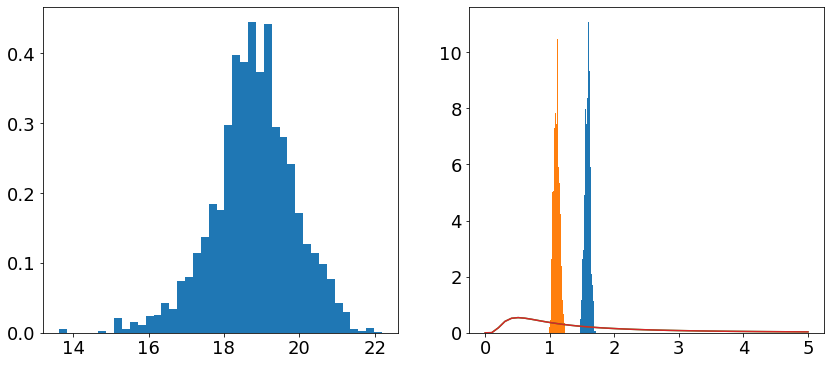

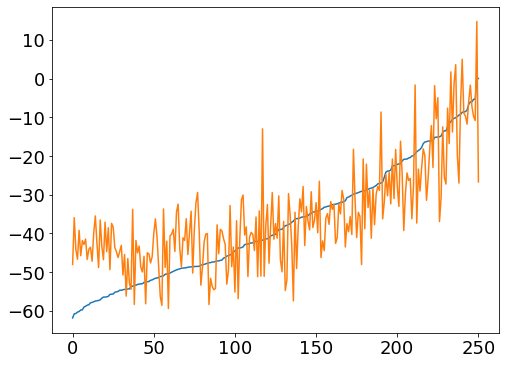

In [121]:
alpha = np.linspace(0,5)
p_alpha = np.exp(alpha_log_prior(alpha))
sigma = np.linspace(0,5)
p_sigma = np.exp(sigma_log_prior(alpha))

full_trace = np.concatenate(trace, axis=0)
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].hist(full_trace[:,2], bins=41  , density = True)
ax[1].hist(full_trace[:,J_dim], bins=21  , density = True)
ax[1].hist(full_trace[:,J_dim+1], bins=21  , density = True)
ax[1].plot(alpha,p_alpha)
ax[1].plot(sigma,p_sigma)

y_pred = np.zeros(len(X[:,0]))
for i,sample in enumerate(full_trace):
    y_pred += X@sample[0:J_dim]

y_mean = y_pred/len(full_trace[:,0])
fig, ax = plt.subplots(figsize=(8,6))
sortOrder = np.argsort(y)

plt.plot(y[sortOrder])
plt.plot(y_mean[sortOrder])

MSE = np.sum((y_mean - y)**2)/len(y)
print(MSE)

<BarContainer object of 33 artists>

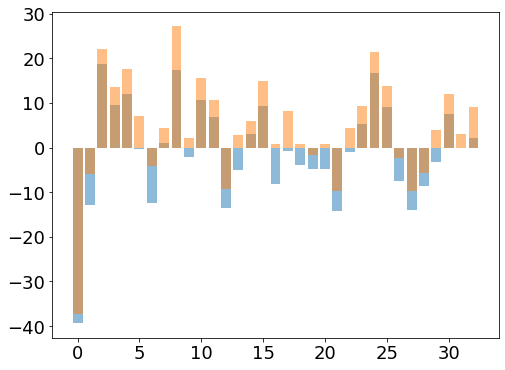

In [129]:
J_mean = (full_trace[:,0:J_dim]).mean(axis = 0)
J_mode = np.max(full_trace[:,0:J_dim], axis = 0)

fig, ax = plt.subplots(figsize = (8,6))
t = np.arange(0,J_dim)
ax.bar(t,height = J_mean, alpha = 0.5)
ax.bar(t,height = J_mode, alpha = 0.5)